In [1]:
import datetime
import itertools
import os
import re
from collections import deque

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import talib
from matplotlib import dates as mdates
from scipy.interpolate import make_smoothing_spline

In [25]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams["font.family"] = font_prop.get_name()
plt.rcParams["font.size"] = 9

In [70]:
a = 0.2
x = np.arange(0, 100, 1)  # HOLD カウント
y = a - (1.0 + a) / (1.0 + x)  # 報酬 あるいは ペナルティ

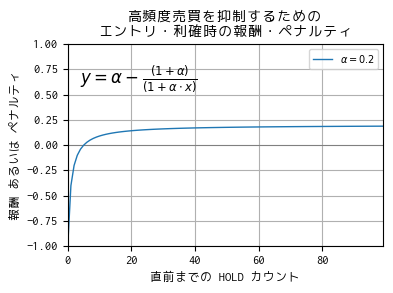

In [71]:
fig, ax = plt.subplots(figsize=(4, 3))
ax.axhline(0, linewidth=0.75, color="gray")
ax.plot(x, y, linewidth=1, color="C0", label=r"$\alpha = 0.2$")
ax.set_title("高頻度売買を抑制するための\nエントリ・利確時の報酬・ペナルティ")
ax.set_xlabel("直前までの HOLD カウント")
ax.set_ylabel("報酬 あるいは ペナルティ")
ax.set_xlim(0, max(x))
ax.set_ylim(-1, 1)
ax.legend(fontsize=7)
ax.text(
    4,
    0.6,
    r"$y = \alpha - \frac{(1 + \alpha)}{(1 + \alpha \cdot x)}$",
    color="black",
    fontsize=12,
)
ax.grid()
plt.tight_layout()
plt.savefig("screenshots/reward_curve_entry_exit.png")
plt.show()